# Mask Classification
Model will predict if the person is 
* With mask
* Without mask

## Getting Data

In [1]:
import opendatasets as od

In [2]:
od.download('https://www.kaggle.com/datasets/ashishjangra27/face-mask-12k-images-dataset')

Skipping, found downloaded files in ".\face-mask-12k-images-dataset" (use force=True to force download)


In [3]:
train_dir = 'face-mask-12k-images-dataset\Face Mask Dataset\Train'
test_dir = 'face-mask-12k-images-dataset\Face Mask Dataset\Test'
valid_dir = 'face-mask-12k-images-dataset\Face Mask Dataset\Validation'

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen = ImageDataGenerator(rescale=1/255.)


train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(30, 30),
                                              class_mode='binary')
test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(30, 30),
                                              class_mode='binary')
valid_data = train_datagen.flow_from_directory(valid_dir,
                                              target_size=(30, 30),
                                              class_mode='binary',
                                              shuffle=False)

Found 10000 images belonging to 2 classes.
Found 992 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


## Visualizing the data

In [5]:
import matplotlib.pyplot as plt

In [6]:
def show_10_random_images(data=train_data):
    classes_names = ['With mask', 'Without mask']
    images, labels = data.__next__()
    plt.figure(figsize=(15, 5))
    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.imshow(images[i])
        plt.title(classes_names[labels[i].argmax()])
        plt.axis(False)
        

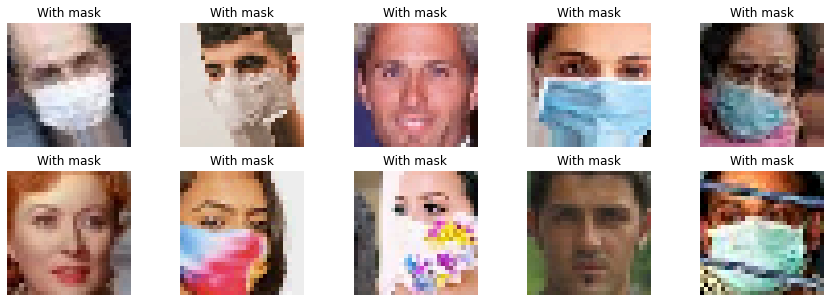

In [7]:
show_10_random_images()

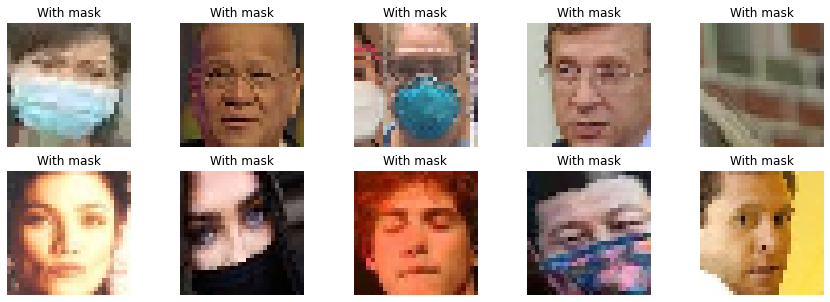

In [8]:
show_10_random_images()

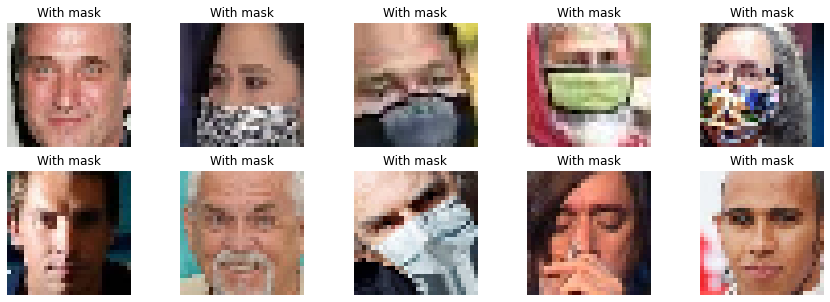

In [9]:
show_10_random_images()

# Modelling

In [10]:
import tensorflow as tf

In [11]:
tf.random.set_seed(42)
basic_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

basic_model.compile(loss='binary_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

history_1 = basic_model.fit(train_data,
                           epochs=10,
                           steps_per_epoch=len(train_data),
                           validation_data=test_data,
                           validation_steps=len(test_data))

Epoch 1/10
313/313 [==============================] - 10s 30ms/step - loss: 0.3105 - accuracy: 0.8882 - val_loss: 0.2075 - val_accuracy: 0.9204
Epoch 2/10
313/313 [==============================] - 9s 29ms/step - loss: 0.1663 - accuracy: 0.9389 - val_loss: 0.1555 - val_accuracy: 0.9405
Epoch 3/10
313/313 [==============================] - 9s 29ms/step - loss: 0.1176 - accuracy: 0.9578 - val_loss: 0.1114 - val_accuracy: 0.9617
Epoch 4/10
313/313 [==============================] - 9s 29ms/step - loss: 0.0765 - accuracy: 0.9735 - val_loss: 0.0825 - val_accuracy: 0.9748
Epoch 5/10
313/313 [==============================] - 9s 29ms/step - loss: 0.0591 - accuracy: 0.9798 - val_loss: 0.0719 - val_accuracy: 0.9778
Epoch 6/10
313/313 [==============================] - 9s 29ms/step - loss: 0.0518 - accuracy: 0.9821 - val_loss: 0.0746 - val_accuracy: 0.9748
Epoch 7/10
313/313 [==============================] - 9s 29ms/step - loss: 0.0460 - accuracy: 0.9833 - val_loss: 0.0543 - val_accuracy: 0.980

## Evaluating the data

In [12]:
basic_model.evaluate(valid_data)

25/25 [==============================] - 1s 25ms/step - loss: 0.0310 - accuracy: 0.9887


[0.03095235303044319, 0.9887499809265137]

## We have more than 98,8% accuracy what makes our model really really good

In [13]:
import pandas as pd

Text(0.5, 0, 'Epochs')

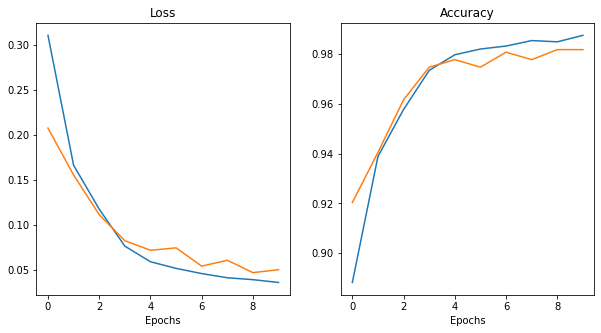

In [14]:
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']


accuracy = history_1.history['accuracy']
val_accuracy = history_1.history['val_accuracy']

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')

plt.subplot(1, 2, 2)
plt.plot(accuracy, label='accuracy')
plt.plot(val_accuracy, label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')

# Predicting Validation Data

In [15]:
from seaborn import heatmap
from sklearn.metrics import confusion_matrix

In [16]:
import numpy as np
# Saving Labels
labels = np.concatenate([label for img, label in [valid_data.__next__() for i in range(len(valid_data))]])

<AxesSubplot:>

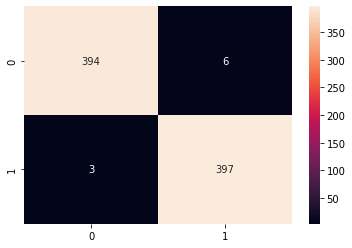

In [17]:
#predcting Validation Data
y_pred = tf.round(basic_model.predict(valid_data))

#Building confusion matrix
conf_mat = confusion_matrix(labels, y_pred)
heatmap(conf_mat, annot=True, fmt='d')

In [18]:
def show_and_predict_10_random_images(data=test_data):
    class_names = ['With mask', 'Without mask']
    images, labels = data.__next__()
    plt.figure(figsize=(15, 7))
    for i in range(10):
        y_pred = tf.cast(tf.round((basic_model.predict(tf.expand_dims(images[i], axis=0)).squeeze())), tf.int32)
        pred_class = class_names[y_pred]
        true_class = class_names[int(labels[i])]
        
        plt.subplot(2, 5, i+1)
        plt.imshow(images[i])
        plt.title(f'True: {true_class}\nPredicted: {pred_class}', c='g' if pred_class ==true_class else 'r')
        plt.axis(False)

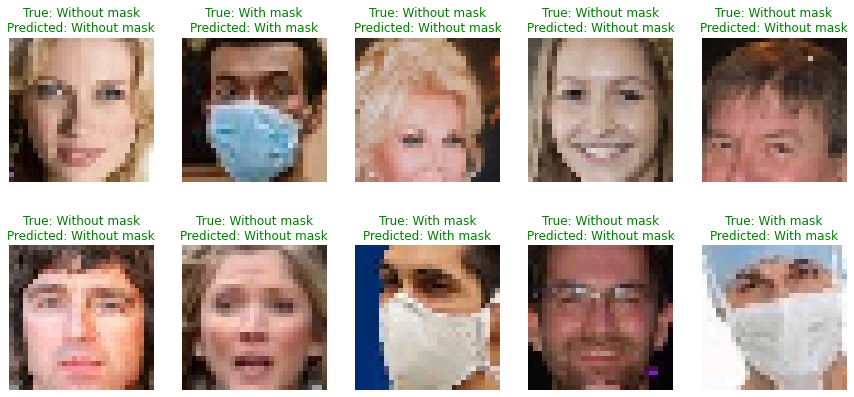

In [19]:
show_and_predict_10_random_images()

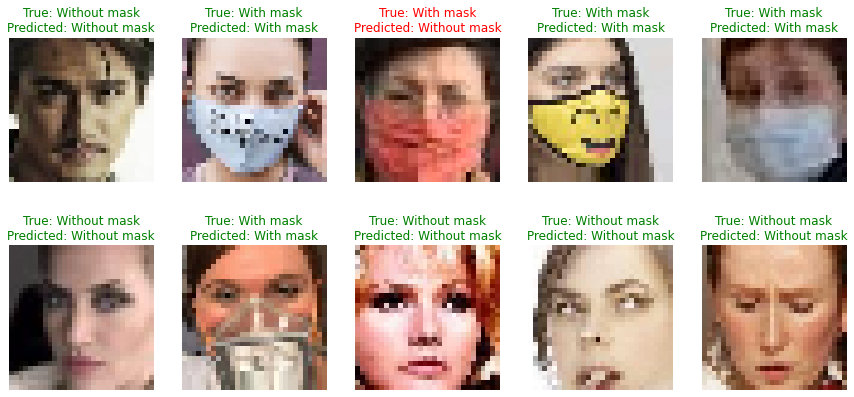

In [20]:
show_and_predict_10_random_images()

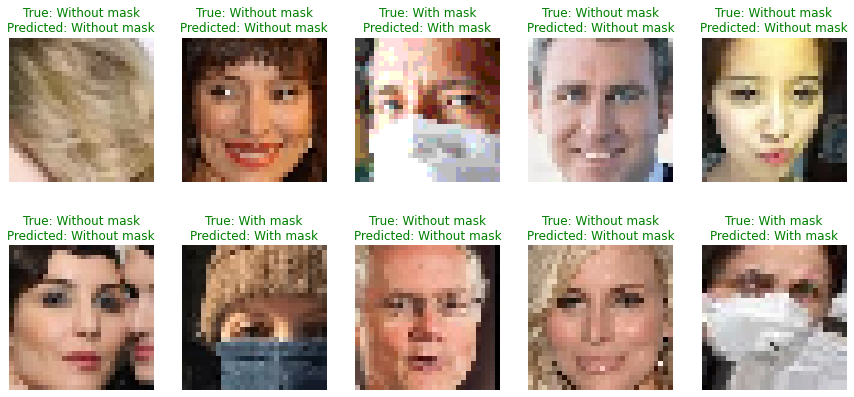

In [21]:
show_and_predict_10_random_images()

# Images That Model Has Problem with

In [24]:
def show_wrong_images(data=test_data):
    class_names = ['With mask', 'Without mask']
    for _ in range(len(data)):
        images, labels = data.__next__()
        for j in range(len(images)):
            y_pred = tf.cast(tf.round((basic_model.predict(tf.expand_dims(images[j], axis=0)).squeeze())), tf.int32)
            pred_class = class_names[y_pred]
            true_class = class_names[int(labels[j])]
            if pred_class != true_class: 
                plt.imshow(images[j])
                plt.title(f'True: {true_class}\nPredicted: {pred_class}', c='g' if pred_class == true_class else 'r')
                plt.axis(False)
                plt.show()

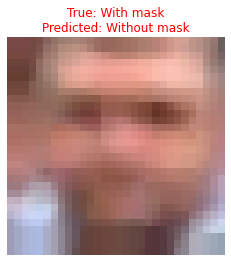

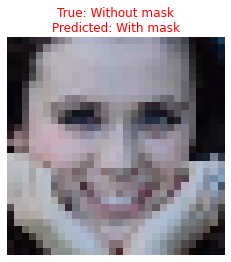

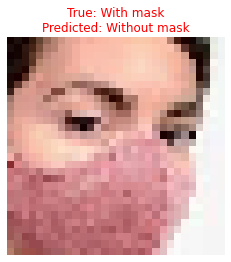

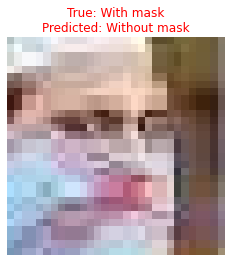

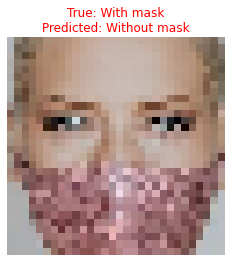

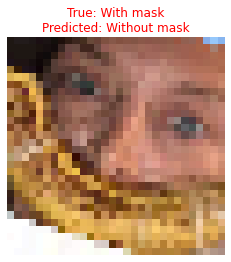

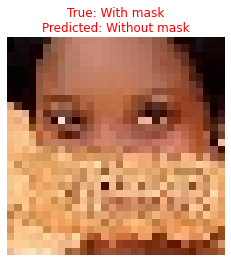

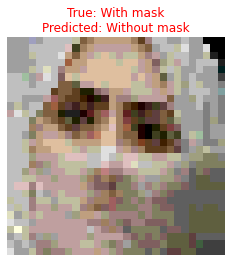

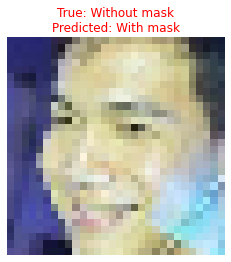

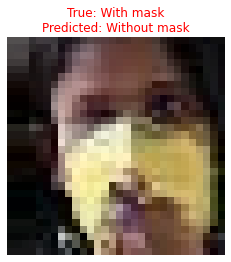

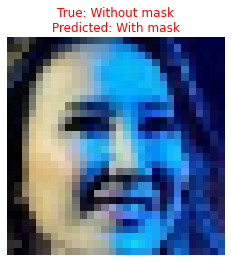

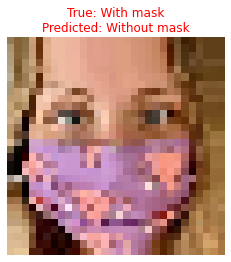

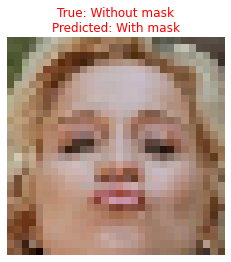

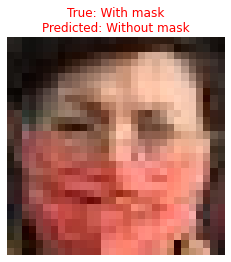

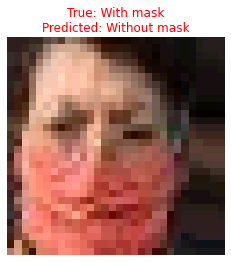

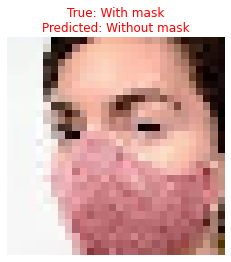

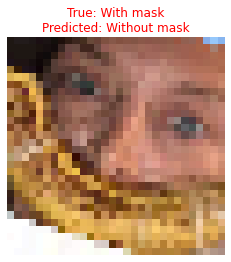

In [25]:
show_wrong_images()

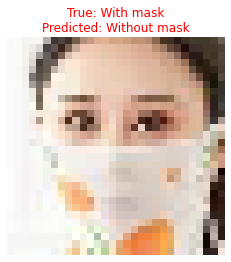

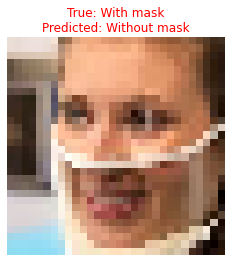

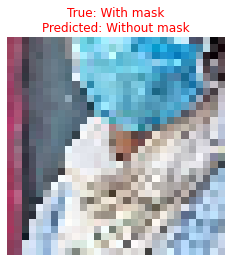

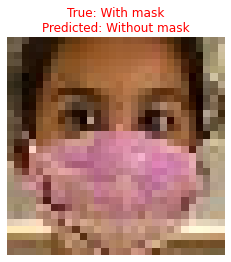

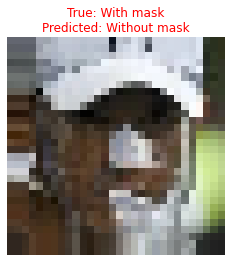

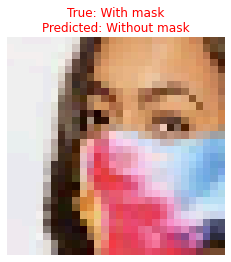

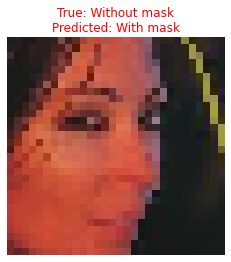

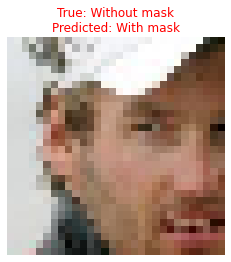

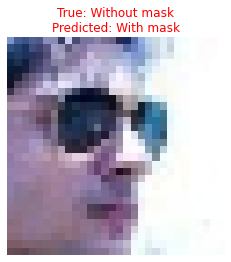

In [26]:
show_wrong_images(valid_data)

# Saving model

In [27]:
basic_model.save('mask_detection_model_98percent')

INFO:tensorflow:Assets written to: mask_detection_model_98percent\assets
